In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
#importing dataset
dataset=pd.read_csv('../datasets/creditcard.csv')
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Analysing dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: >

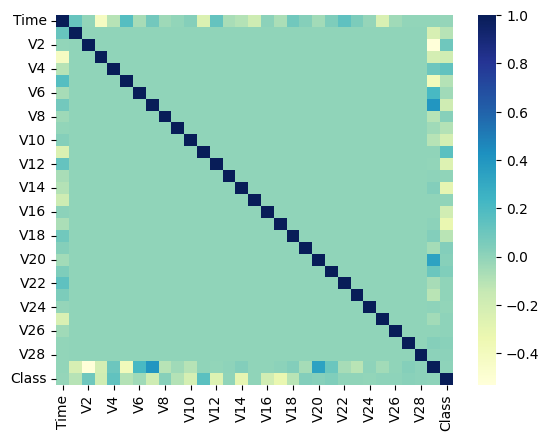

In [20]:
sns.heatmap(dataset.corr(),cmap='YlGnBu')
#we can see we have only three column to which we can create our model

Text(0, 0.5, 'Frequency')

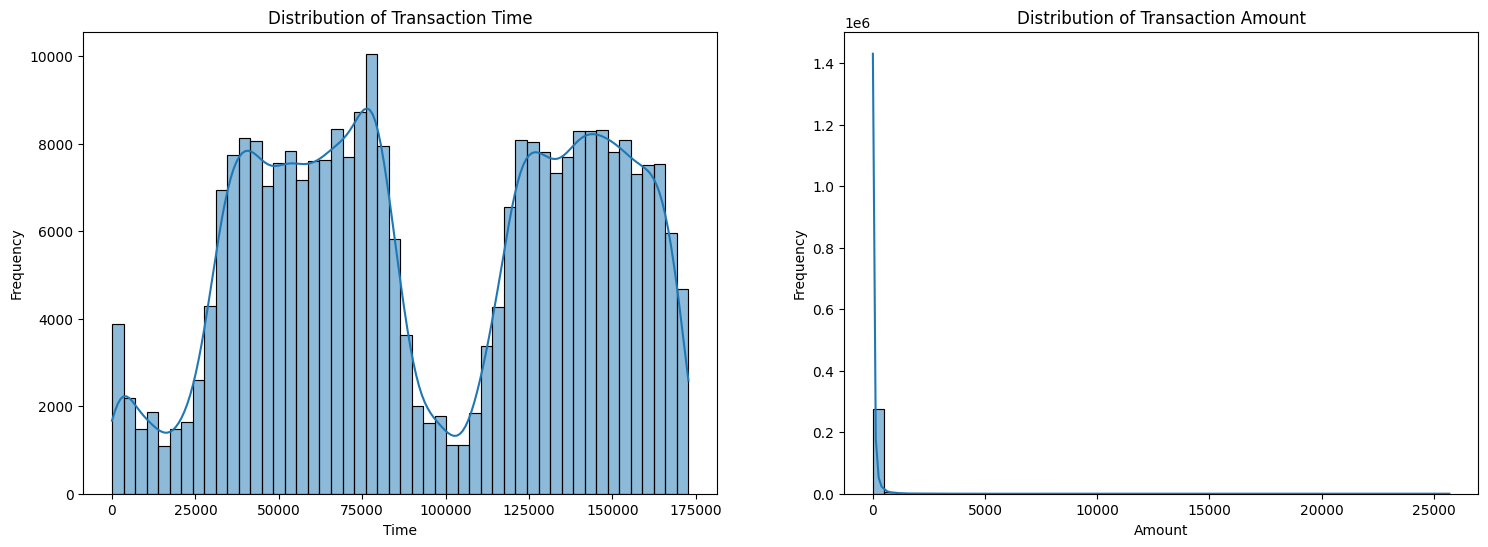

In [8]:
#focusing on time and amount column

fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(dataset['Time'], bins=50, ax=ax[0], kde=True)
ax[0].set_title('Distribution of Transaction Time')
ax[0].set_ylabel('Frequency')

sns.histplot(dataset['Amount'], bins=50, ax=ax[1], kde=True)
ax[1].set_title('Distribution of Transaction Amount')
ax[1].set_ylabel('Frequency')

In [9]:
#focusing on class
legit = dataset[dataset['Class']==0]
fraud = dataset[dataset['Class']==1]
legit['Amount'].describe(),fraud['Amount'].describe()

(count    284315.000000
 mean         88.291022
 std         250.105092
 min           0.000000
 25%           5.650000
 50%          22.000000
 75%          77.050000
 max       25691.160000
 Name: Amount, dtype: float64,
 count     492.000000
 mean      122.211321
 std       256.683288
 min         0.000000
 25%         1.000000
 50%         9.250000
 75%       105.890000
 max      2125.870000
 Name: Amount, dtype: float64)

In [10]:
dataset['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [22]:
legit_s = legit.sample(n=fraud.shape[0])

In [12]:
new_dataset = pd.concat([legit_s,fraud],axis=0)
new_dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27890,34754.0,1.391007,-1.469809,1.168768,-1.134833,-2.088535,0.077296,-1.733541,0.245543,-0.810584,...,-0.226671,-0.138953,0.106559,0.034314,0.121243,-0.161810,0.084089,0.027576,22.00,0
52121,45282.0,-0.911082,0.883057,1.297294,0.179013,0.282840,0.007072,0.549779,-0.645990,-0.214892,...,0.737611,-0.266764,-0.173669,-0.032738,0.168139,-0.514021,0.173625,0.100735,40.00,0
190731,128964.0,-0.602339,0.233538,0.744375,-1.124430,-0.039767,-0.128280,0.726953,-0.228307,-1.400334,...,-0.073782,0.318275,-0.517885,0.620512,0.827268,0.590705,-0.043523,0.033021,90.98,0


In [13]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93356.514228,0.052790,0.052119,-0.030228,-0.004353,-0.005929,-0.057332,0.040127,-0.048715,-0.028419,...,-0.005653,0.017801,0.003473,-0.027060,0.023708,-0.013101,0.037436,-0.001136,0.044018,77.110874
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
#training model
X=new_dataset.drop('Class',axis=1)
Y=new_dataset['Class']

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30 , random_state=40)
print(X.shape,X_train.shape,X_test.shape,Y.shape,Y_train.shape,Y_test.shape)

(984, 30) (688, 30) (296, 30) (984,) (688,) (296,)


In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [17]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [18]:
accuracy_score_training = accuracy_score(X_train_prediction,Y_train)
accuracy_score_testing = accuracy_score(X_test_prediction,Y_test)

print(f"accuracy of model on training data is {accuracy_score_training}")
print(f"accuracy of model on testing data is {accuracy_score_testing}")

accuracy of model on training data is 0.9433139534883721
accuracy of model on testing data is 0.918918918918919


In [19]:
#this accuracy report shows this model is balanced...